# Detecção de faces

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/19E7nSqpNtccruzFkXDVC99O9pcqqJyQZ?usp=drive_link)

#### Instala a biblioteca OpenCV é uma biblioteca para processamento de imagens e visão computacional

In [9]:
!pip install opencv-python

In [10]:
import cv2

###Armazena a imagem na variavel imagePath

In [11]:
imagePath = '\exemplo_imagem.png'

### Lê a imagem usando o OpenCV
### cv2.imread() carrega a imagem em um array numpy

In [12]:
img = cv2.imread(imagePath)

### Exibe as dimensões da imagem carregada
### Retorna uma tupla com: (altura, largura, canais de cor)
### Canais de cor: 3 para BGR (Blue, Green, Red)

In [13]:
img.shape

(855, 640, 3)

### Converte a imagem para tons de cinza
### Isso simplifica o processamento para a detecção
### BGR é o formato padrão do OpenCV

In [14]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Exibe as dimensões da imagem em tons de cinza
### Agora tem apenas 2 dimensões: (altura, largura) - sem canal de cor

In [15]:
gray_image.shape

(855, 640)

### Exibe a imagem em tons de cinza

array([[114, 113, 111, ..., 117, 118, 118],
       [112, 111, 110, ..., 117, 118, 118],
       [111, 110, 109, ..., 116, 117, 118],
       ...,
       [ 69,  69,  68, ...,  41,  40,  39],
       [ 71,  70,  69, ...,  41,  40,  39],
       [ 72,  71,  70, ...,  41,  40,  39]], dtype=uint8)
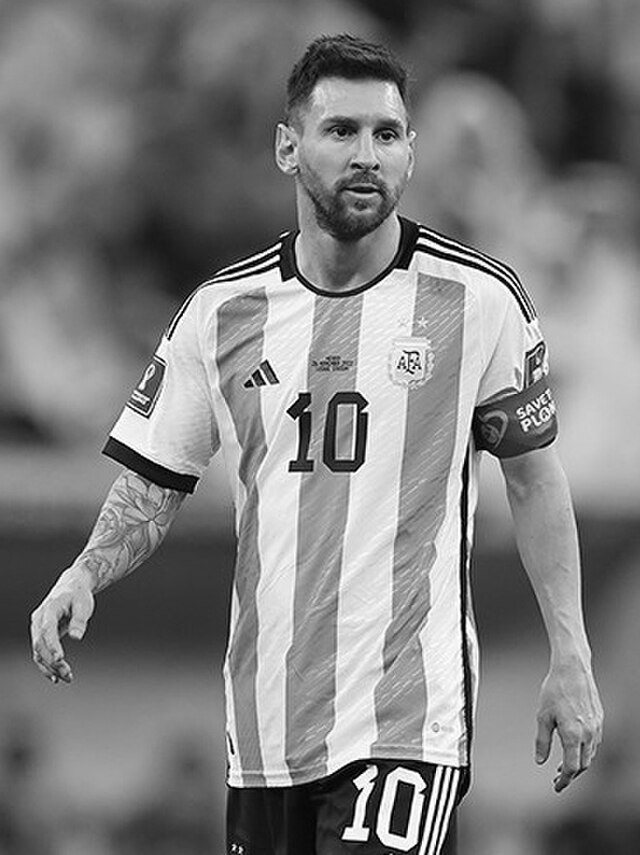

In [16]:
gray_image

### Carrega o classificador em cascata para detecção de faces frontais
### Haarcascade é um algoritmo de detecção de objetos pré-treinado

In [17]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

### Detecta faces na imagem em tons de cinza
### detectMultiScale() retorna retângulos ao redor das faces detectadas
## Parâmetros:
### - gray_image: imagem de entrada (tons de cinza)
### - scaleFactor=1.1: fator de redução da imagem em cada escala (para detectar faces de diferentes tamanhos)
### - minNeighbors=5: número mínimo de vizinhos para considerar uma detecção válida
### - minSize=(40, 40): tamanho mínimo do objeto a ser detectado (em pixels)

In [18]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

### Loop através de todas as faces detectadas
### Cada face é representada por: (x, y, largura, altura)
### x, y: coordenadas do canto superior esquerdo do retângulo
### w, h: largura e altura do retângulo

In [22]:
for (x, y, w, h) in face:
# Desenha um retângulo verde ao redor de cada face detectada
    # cv2.rectangle() desenha um retângulo na imagem
    # Parâmetros:
    # - img: imagem original onde desenhar
    # - (x, y): ponto inicial (canto superior esquerdo)
    # - (x + w, y + h): ponto final (canto inferior direito)
    # - (0, 255, 0): cor BGR (verde)
    # - 4: espessura da linha em pixels
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

### Converte a imagem de BGR para RGB

In [20]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Exibe a imagem

(np.float64(-0.5), np.float64(639.5), np.float64(854.5), np.float64(-0.5))

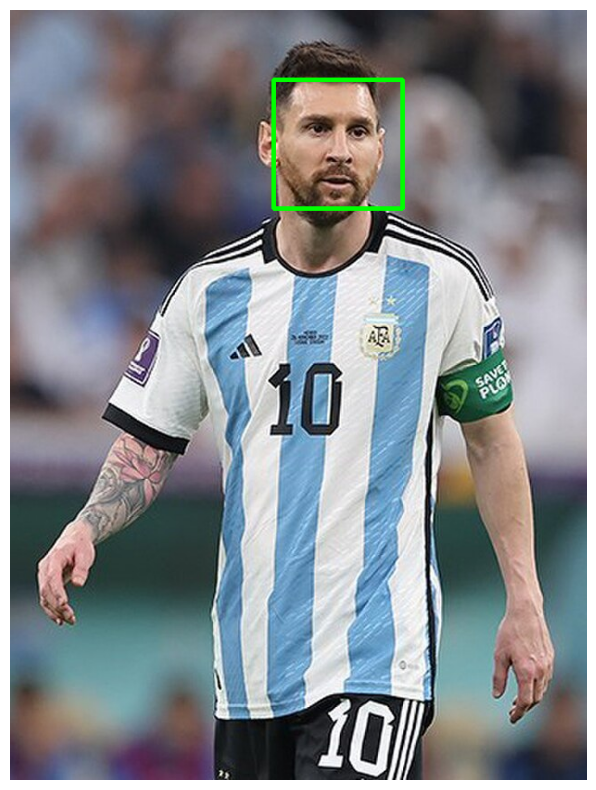

In [21]:
import matplotlib.pyplot as plt

# Importa a biblioteca Matplotlib para visualização de imagens e gráficos.

plt.figure(figsize=(20,10))
# Cria uma nova figura para o plot com um tamanho especificado (20 polegadas de largura por 10 polegadas de altura).
plt.imshow(img_rgb)
# Exibe a imagem com os retângulos (agora em formato RGB) na figura criada.
plt.axis('off')
# Desativa a exibição dos eixos (números e marcas) no plot para uma visualização mais limpa da imagem.

In [ ]:
print("""
Este código realiza DETECÇÃO DE FACES em uma imagem usando OpenCV:

PASSO A PASSO:

1. INSTALAÇÃO E IMPORTAÇÃO:
   - Instala a biblioteca OpenCV
   - Importa as bibliotecas necessárias

2. CARREGAMENTO DA IMAGEM:
   - Carrega uma imagem específica do sistema de arquivos do Colab
   - Mostra as dimensões da imagem original

3. PRÉ-PROCESSAMENTO:
   - Converte a imagem colorida para tons de cinza
   - Reduz a complexidade e melhora a detecção

4. DETECÇÃO DE FACES:
   - Carrega um classificador pré-treinado para faces frontais
   - Aplica o algoritmo de detecção na imagem em tons de cinza
   - Encontra coordenadas de todas as faces detectadas

5. MARCAÇÃO DAS FACES:
   - Desenha retângulos verdes ao redor de cada face detectada
   - Usa as coordenadas retornadas pelo detector

6. VISUALIZAÇÃO:
   - Converte a imagem de BGR (OpenCV) para RGB (matplotlib)
   - Cria uma figura grande para melhor visualização
   - Exibe a imagem com as faces marcadas
   - Remove os eixos para visualização mais limpa

O código detecta automaticamente rostos humanos em uma imagem e os destaca
com retângulos verdes. O algoritmo haarcascade é eficiente para detecção
de faces frontais em tempo real.
""")